# Football Player Price Calculator

### Mid-Term Project

#### Samusudeen Afolabi & Elisa Cerdá Doñate

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("PlayerValueData.csv")

### Initial Data Exploration

In [3]:
# Shape description

df.shape # Shows a shape of (2075, 548)


# Analysis of missing values for df

cols_with_null = df.isnull().sum().to_frame()
cols_with_null.head(60)

,0
Player,0
Club,0
Age,0
Position,0
Nation,0
Value,0
Contract Years Left,0
League,0
Squad (20/21),165
MP (20/21),165


We won't be working with the 548 columns,and since there many rows with plenty of null values in the columns,
we will drop first all those columns for which there is too much information missing

### Data Cleaning: Column and Row Cleaning

In [4]:
# Dropping columns with more than 165 missing values

cols_to_drop = df.columns[df.isnull().sum()>165]

df_with_drops = df.drop(cols_to_drop, axis=1)

In [5]:
# We still have several columns with 165 null values

cols_with_null = df_with_drops.isnull().sum().to_frame()
cols_with_null.head(60)


# We are going to drop the rows that have null values for such columns

df_with_drops.dropna(subset=['Squad (20/21)'], inplace=True)

cols_with_null = df_with_drops.isnull().sum().to_frame()

In [6]:
# Checking if there are still any null values in our dataframe

df_with_drops.isnull().values.any() # All null values have been cleaned

False

In [7]:
df_with_drops.shape # Current shape after drops is (1910, 129)

(1910, 129)

In [8]:
# Homogenization of data types within categorical variables

df_with_drops["Player"] = df_with_drops["Player"].apply(lambda x: str(x))
df_with_drops["Nation"] = df_with_drops["Nation"].apply(lambda x: str(x))
df_with_drops["Club"] = df_with_drops["Club"].apply(lambda x: str(x))
df_with_drops["Position"] = df_with_drops["Position"].apply(lambda x: str(x))
df_with_drops["League"] = df_with_drops["League"].apply(lambda x: str(x))

In [9]:
# Current column description

col_list = df_with_drops.columns.values.tolist()

len(col_list)

# Since we still have 129 columns, we decided to drop several of them for the construction of the model
# and work only with the variables that are considered to be the most critical ones

129

In [10]:
# Definition of the new dataframe with the key variables we will be exclusively working with

df_clean = df_with_drops[['Player', 'Club', 'League', 'Age', 'Position', 'Nation', 'Contract Years Left', 'MP (20/21)', 'Starts (20/21)', 'Gls (20/21)', 'Ast (20/21)', '(G+A)/90 (20/21)', 'Total Shots (20/21)', 'Total Shots on Target (20/21)', 'Touches (20/21)', 'Total Distance Carried the Ball in Forward Direction (20/21)', 'Passes Completed (All pass-types) (20/21)', 'Total Completed Progressive Passes (20/21)', 'Total Defensive Blocks (20/21)', 'Total Shots Blocked (20/21)', 'Goal Saving Blocks (20/21)', 'Total Clearances (20/21)', 'Fouls Committed (20/21)', 'Crosses (20/21)', 'Aerial Duel Won (20/21)', 'Value']]

In [11]:
df_clean.shape # Current shape is (1910, 26)

(1910, 26)

In [12]:
# Save clean data to a csv file

df_clean.to_csv("playervalue_clean.csv")

### Data Cleaning: Data Type Curation

In [13]:
df_clean.dtypes # "Contract Years Left" should be a float, but it is stored as an object

Player                                                           object
Club                                                             object
League                                                           object
Age                                                               int64
Position                                                         object
Nation                                                           object
Contract Years Left                                              object
MP (20/21)                                                      float64
Starts (20/21)                                                  float64
Gls (20/21)                                                     float64
Ast (20/21)                                                     float64
(G+A)/90 (20/21)                                                float64
Total Shots (20/21)                                             float64
Total Shots on Target (20/21)                                   

In [14]:
# Exploration of values taken by 'Contract Years Left'

df_clean['Contract Years Left'].value_counts() # The value "fail" is present

1.00     531
2.00     512
3.00     470
4.00     258
5.00      85
fail      39
6.00      12
7.00       1
10.00      1
0.00       1
Name: Contract Years Left, dtype: int64

In [15]:
# We decided to transform the "fail" values in 'Contract Years Left' to 0,
# as data exploration on the internet pointed towards a lack of contract
# by that time for the players presenting the value "fail"

df_clean.replace(to_replace = "fail", value = 0, inplace = True)

df_clean["Contract Years Left"] = df_clean["Contract Years Left"].apply(lambda x: float(x))

len(df_clean[df_clean['Contract Years Left']=='fail']) # Check for conversion of all "fail" to 0

/var/folders/mn/5541kpdx47q2cp7l_4fp_ftm0000gn/T/ipykernel_30456/1494588852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.replace(to_replace = "fail", value = 0, inplace = True)
/var/folders/mn/5541kpdx47q2cp7l_4fp_ftm0000gn/T/ipykernel_30456/1494588852.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Contract Years Left"] = df_clean["Contract Years Left"].apply(lambda x: float(x))


0

In [16]:
df_clean.dtypes # Finally, only the categorical variables are non-numerical

Player                                                           object
Club                                                             object
League                                                           object
Age                                                               int64
Position                                                         object
Nation                                                           object
Contract Years Left                                             float64
MP (20/21)                                                      float64
Starts (20/21)                                                  float64
Gls (20/21)                                                     float64
Ast (20/21)                                                     float64
(G+A)/90 (20/21)                                                float64
Total Shots (20/21)                                             float64
Total Shots on Target (20/21)                                   

### Data Exploration: Data Visualization

<Axes: xlabel='Age', ylabel='Value'>

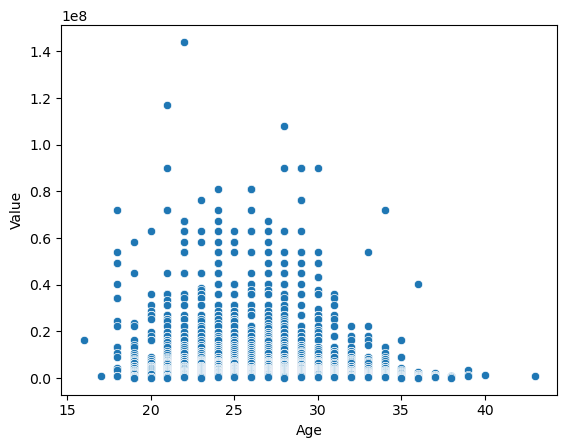

In [17]:
sns.scatterplot(x = df_clean['Age'], y = df_clean['Value'])

<Axes: >

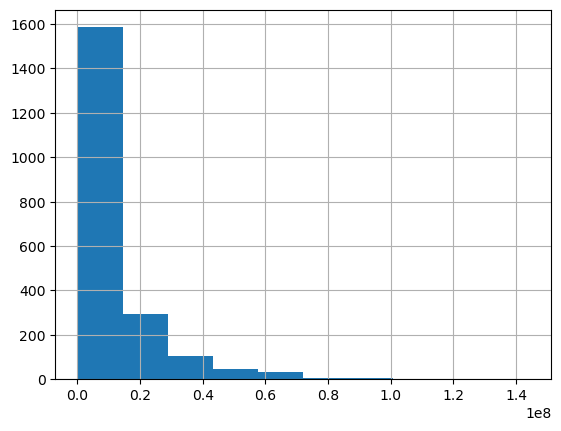

In [18]:
# Checking if the target variable is skewed

df['Value'].hist() # target variable highly skewed to the left

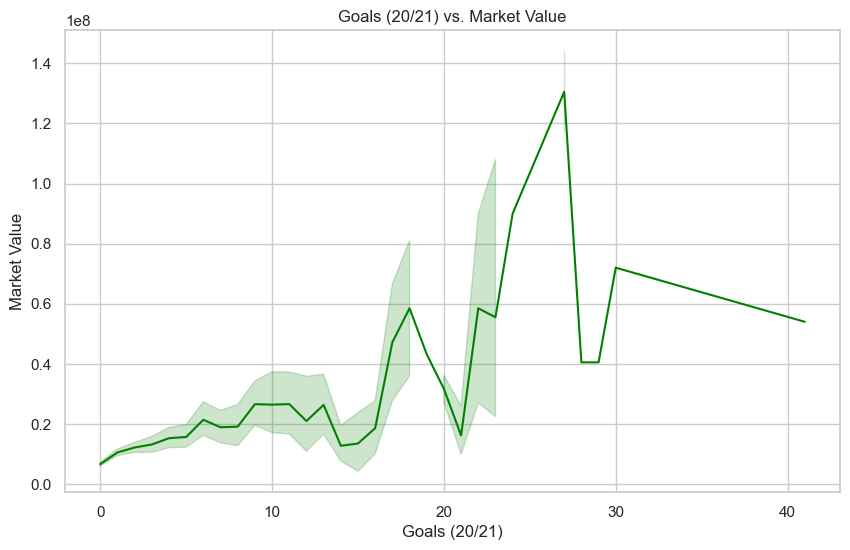

In [19]:
# Plot to show the relationship between goal scored and market value

sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Gls (20/21)', y='Value', data=df, color='green')

# Set plot labels and title
plt.title('Goals (20/21) vs. Market Value')
plt.xlabel('Goals (20/21)')
plt.ylabel('Market Value')

# Show the plot
plt.show()

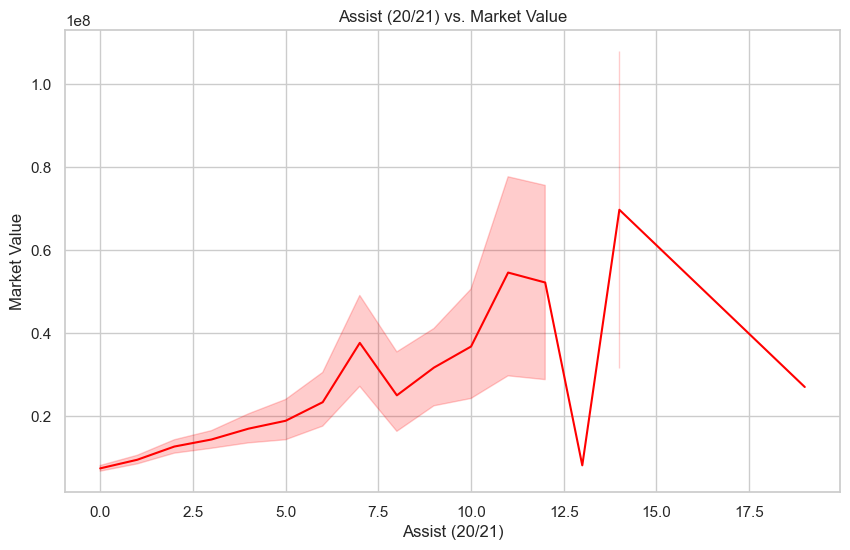

In [20]:
# Plot showing the relationship between assists and market value

sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Ast (20/21)', y='Value', data=df, color='red')

# Set plot labels and title
plt.title('Assist (20/21) vs. Market Value')
plt.xlabel('Assist (20/21)')
plt.ylabel('Market Value')

# Show the plot
plt.show()

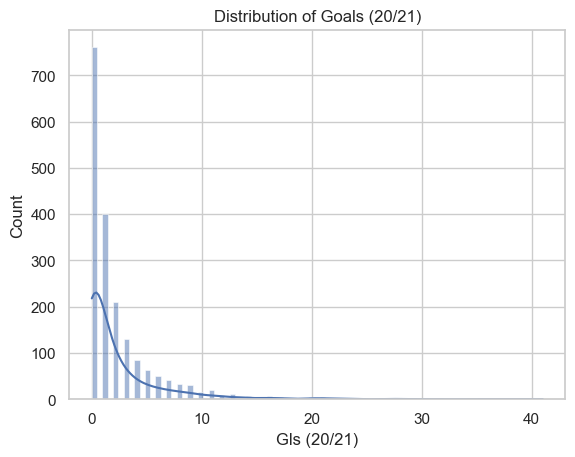

In [21]:
# Check the distribution of 'Gls (20/21)'

sns.histplot(df['Gls (20/21)'], kde=True)
plt.title('Distribution of Goals (20/21)')
plt.show()

# There is a high skew to no goals or a small amount of goals

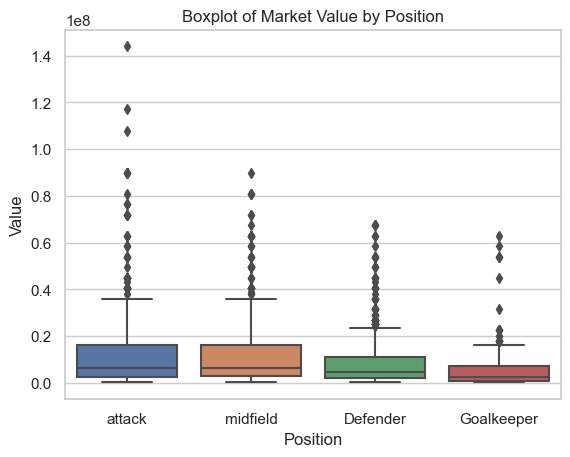

In [22]:
# Creating boxplot of market value by 'Position'

sns.boxplot(x='Position', y='Value', data=df)
plt.title('Boxplot of Market Value by Position')
plt.show()

# We see correlation between value and position

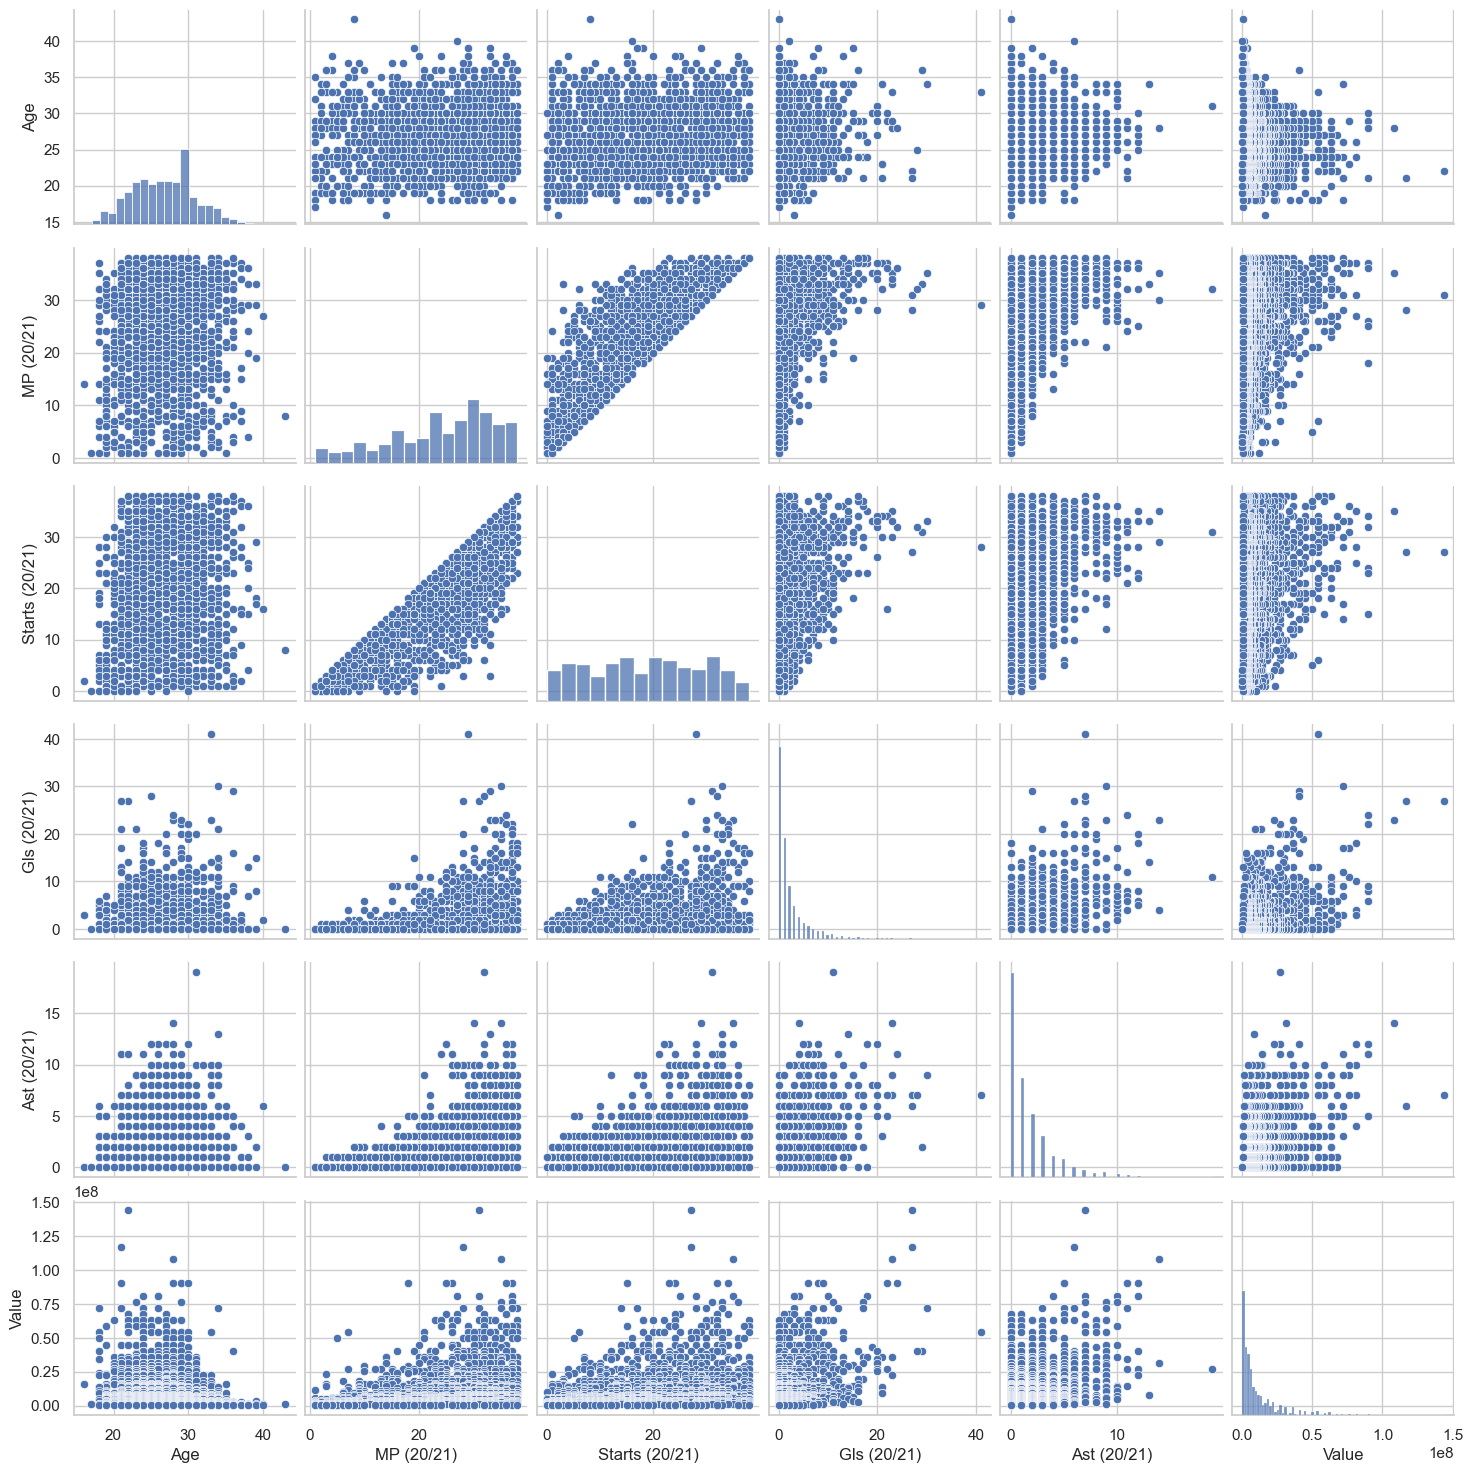

In [23]:
# Creating a pairplot for numerical variables

numeric_columns = ['Age', 'Contract Years Left', 'MP (20/21)', 'Starts (20/21)', 'Gls (20/21)', 'Ast (20/21)', 'Value']

sns.pairplot(df[numeric_columns])
plt.show()

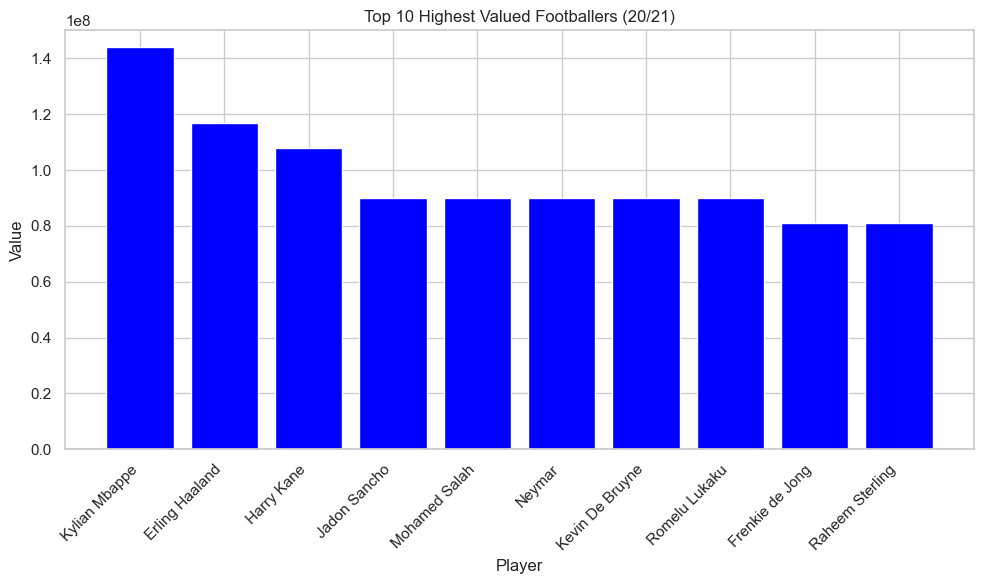

In [24]:
# Top 10 highest valued players


df_clean.sort_values(by = 'Value', ascending = False).head(10)
sorted_df = df_clean.sort_values(by='Value', ascending=False)

# Select the top 10 highest-valued footballers for plotting

top_10 = sorted_df.head(10)

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(top_10['Player'], top_10['Value'], color='blue')
plt.ylim(0,150000000)
plt.xlabel('Player')
plt.ylabel('Value')
plt.title('Top 10 Highest Valued Footballers (20/21)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot

plt.show()

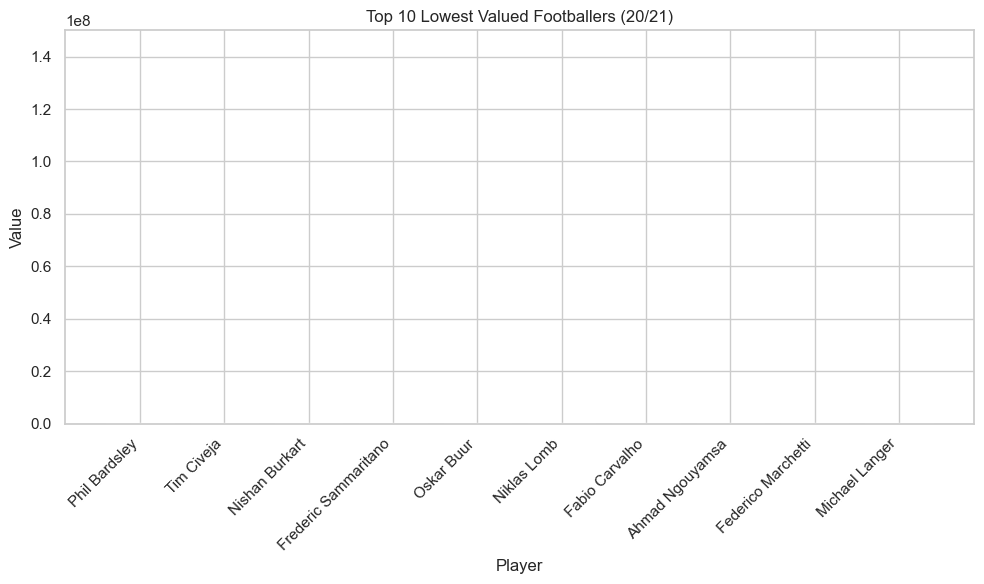

In [25]:
# Top 10 lowest valued players with same scaling as top10 players


df_clean.sort_values(by = 'Value', ascending = False).tail(10)
sorted_df = df_clean.sort_values(by='Value', ascending=False)

# Select the top 10 highest-valued footballers for plotting

bottom_10 = sorted_df.tail(10)

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(bottom_10['Player'], bottom_10['Value'], color='blue')
plt.ylim(0,150000000)
plt.xlabel('Player')
plt.ylabel('Value')
plt.title('Top 10 Lowest Valued Footballers (20/21)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot

plt.show()

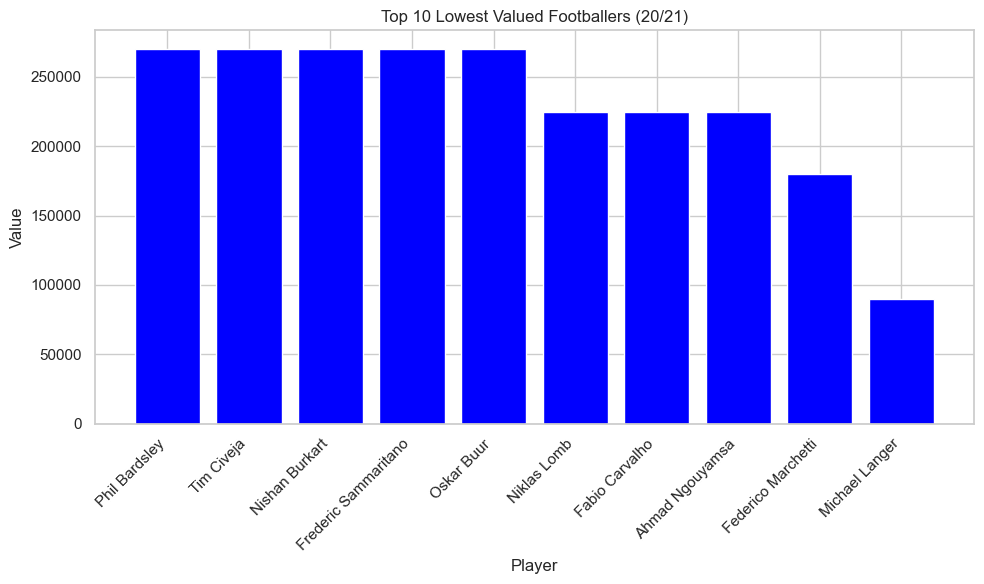

In [26]:
# Top 10 lowest valued players with own scaling


df_clean.sort_values(by = 'Value', ascending = False).tail(10)
sorted_df = df_clean.sort_values(by='Value', ascending=False)

# Select the top 10 highest-valued footballers for plotting

bottom_10 = sorted_df.tail(10)

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(bottom_10['Player'], bottom_10['Value'], color='blue')
#plt.ylim(0,150000000)
plt.xlabel('Player')
plt.ylabel('Value')
plt.title('Top 10 Lowest Valued Footballers (20/21)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot

plt.show()

### Data Curation: Removal of Outliers in Target Variable "Value"

In [27]:
max(df_clean['Value']) # max value is 144000000
min(df_clean['Value']) # max value is 90000

90000

In [28]:
# Application of a 3-sigma filter on the target variable "Value" to get rid of outliers

median_value = df_clean['Value'].median()
std_value = df_clean['Value'].std()

In [29]:
upper_filter = median_value + 3*std_value
lower_filter = median_value - 3*std_value

In [30]:
df_clean = df_clean[(df_clean['Value']  < upper_filter) & (df_clean['Value']  > lower_filter)]

In [31]:
df_clean.shape

(1845, 26)

In [32]:
max(df_clean['Value']) # max value is 144000000
min(df_clean['Value']) # max value is 49500000

90000

### Data Curation: Transformation of "Value" Column

The "Value" column presents really high values compared to the other variables. For this reason, it is better to use a "Value *10^4" to use the data.

In [33]:
# Conversion of "Value" column to "Value *10^4"

df_clean['Value *10^4'] = df_clean['Value']/10000

df_clean['Value *10^4'] = df_clean['Value *10^4'].apply(lambda x: int(x))

df_clean = df_clean.drop('Value', axis=1)

df_clean

,Player,Club,League,Age,Position,Nation,Contract Years Left,MP (20/21),Starts (20/21),Gls (20/21),...,Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21),Value *10^4
65,Eduardo Camavinga,Real Madrid,La Liga,18,midfield,France,6.0,35.0,28.0,1.0,...,1447.0,99.0,38.0,3.0,0.0,20.0,56.0,4.0,28.0,4950
66,Joao Cancelo,Manchester City,Premier League,27,Defender,Portugal,4.0,28.0,27.0,2.0,...,1795.0,166.0,38.0,3.0,0.0,36.0,36.0,69.0,35.0,4950
67,Franck Kessie,AC Milan,Serie A,24,midfield,Cote d'Ivoire,1.0,37.0,36.0,13.0,...,1816.0,123.0,75.0,18.0,0.0,59.0,65.0,16.0,52.0,4950
68,Jude Bellingham,Borussia Dortmund,Bundesliga,18,midfield,England,4.0,29.0,19.0,1.0,...,889.0,76.0,40.0,6.0,0.0,20.0,40.0,21.0,28.0,4950
69,Richarlison,Everton FC,Premier League,24,attack,Brazil,3.0,34.0,33.0,7.0,...,534.0,42.0,33.0,3.0,0.0,38.0,34.0,23.0,42.0,4950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,Niklas Lomb,Bayer 04 Leverkusen,Bundesliga,28,Goalkeeper,Germany,1.0,2.0,1.0,0.0,...,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
2062,Fabio Carvalho,Fulham FC,Premier League,19,midfield,England,1.0,4.0,3.0,1.0,...,67.0,5.0,6.0,0.0,0.0,0.0,4.0,2.0,1.0,22
2066,Ahmad Ngouyamsa,Dijon FCO,Ligue 1,20,Defender,Cameroon,1.0,3.0,2.0,0.0,...,66.0,1.0,8.0,1.0,0.0,7.0,4.0,3.0,2.0,22
2069,Federico Marchetti,Genoa CFC,Serie A,38,Goalkeeper,Italy,1.0,4.0,4.0,0.0,...,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18


In [34]:
df_clean.to_csv("player_value_clean_final.csv")

### Further Data Exploration: Correlation Matrix

To assess how the numerical variables are correlated with each other, we will create a new dataframe containing only numerical variables.

In [35]:
# Creation of a new dataframe containing exclusively numerical variables

df_num = df_clean.select_dtypes(exclude=['object'])

In [36]:
# Correlation matrix for numerical variables

corr_matrix = df_num.corr()

In [37]:
corr_matrix.head()

,Age,Contract Years Left,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),(G+A)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Touches (20/21),...,Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21),Value *10^4
Age,1.000000,-0.384863,0.113679,0.185030,0.055367,0.050626,-0.007142,0.007520,0.005747,0.139490,...,0.146331,0.092357,0.008069,0.063851,0.058038,0.079308,-0.006590,0.026233,0.081385,-0.227143
Contract Years Left,-0.384863,1.000000,0.146807,0.135153,0.087059,0.078158,0.035759,0.124868,0.114719,0.138364,...,0.122473,0.097698,0.116913,0.029571,0.013419,0.036959,0.104837,0.095769,0.062726,0.344076
MP (20/21),0.113679,0.146807,1.000000,0.868213,0.379280,0.416330,0.176956,0.514934,0.451543,0.735287,...,0.629822,0.557785,0.568681,0.310360,0.116201,0.317537,0.609895,0.384351,0.419346,0.320251
Starts (20/21),0.185030,0.135153,0.868213,1.000000,0.311637,0.356780,0.015421,0.411997,0.352675,0.849569,...,0.755595,0.600676,0.636952,0.433503,0.161603,0.458823,0.567434,0.349678,0.472235,0.326282
Gls (20/21),0.055367,0.087059,0.379280,0.311637,1.000000,0.503522,0.720524,0.847563,0.897423,0.125163,...,0.021618,0.166037,0.056228,-0.077714,-0.060947,-0.120925,0.318587,0.228985,0.240221,0.370949


Text(0.5, 1.0, 'Correlation Heatmap for Football Players Data (20/21)')

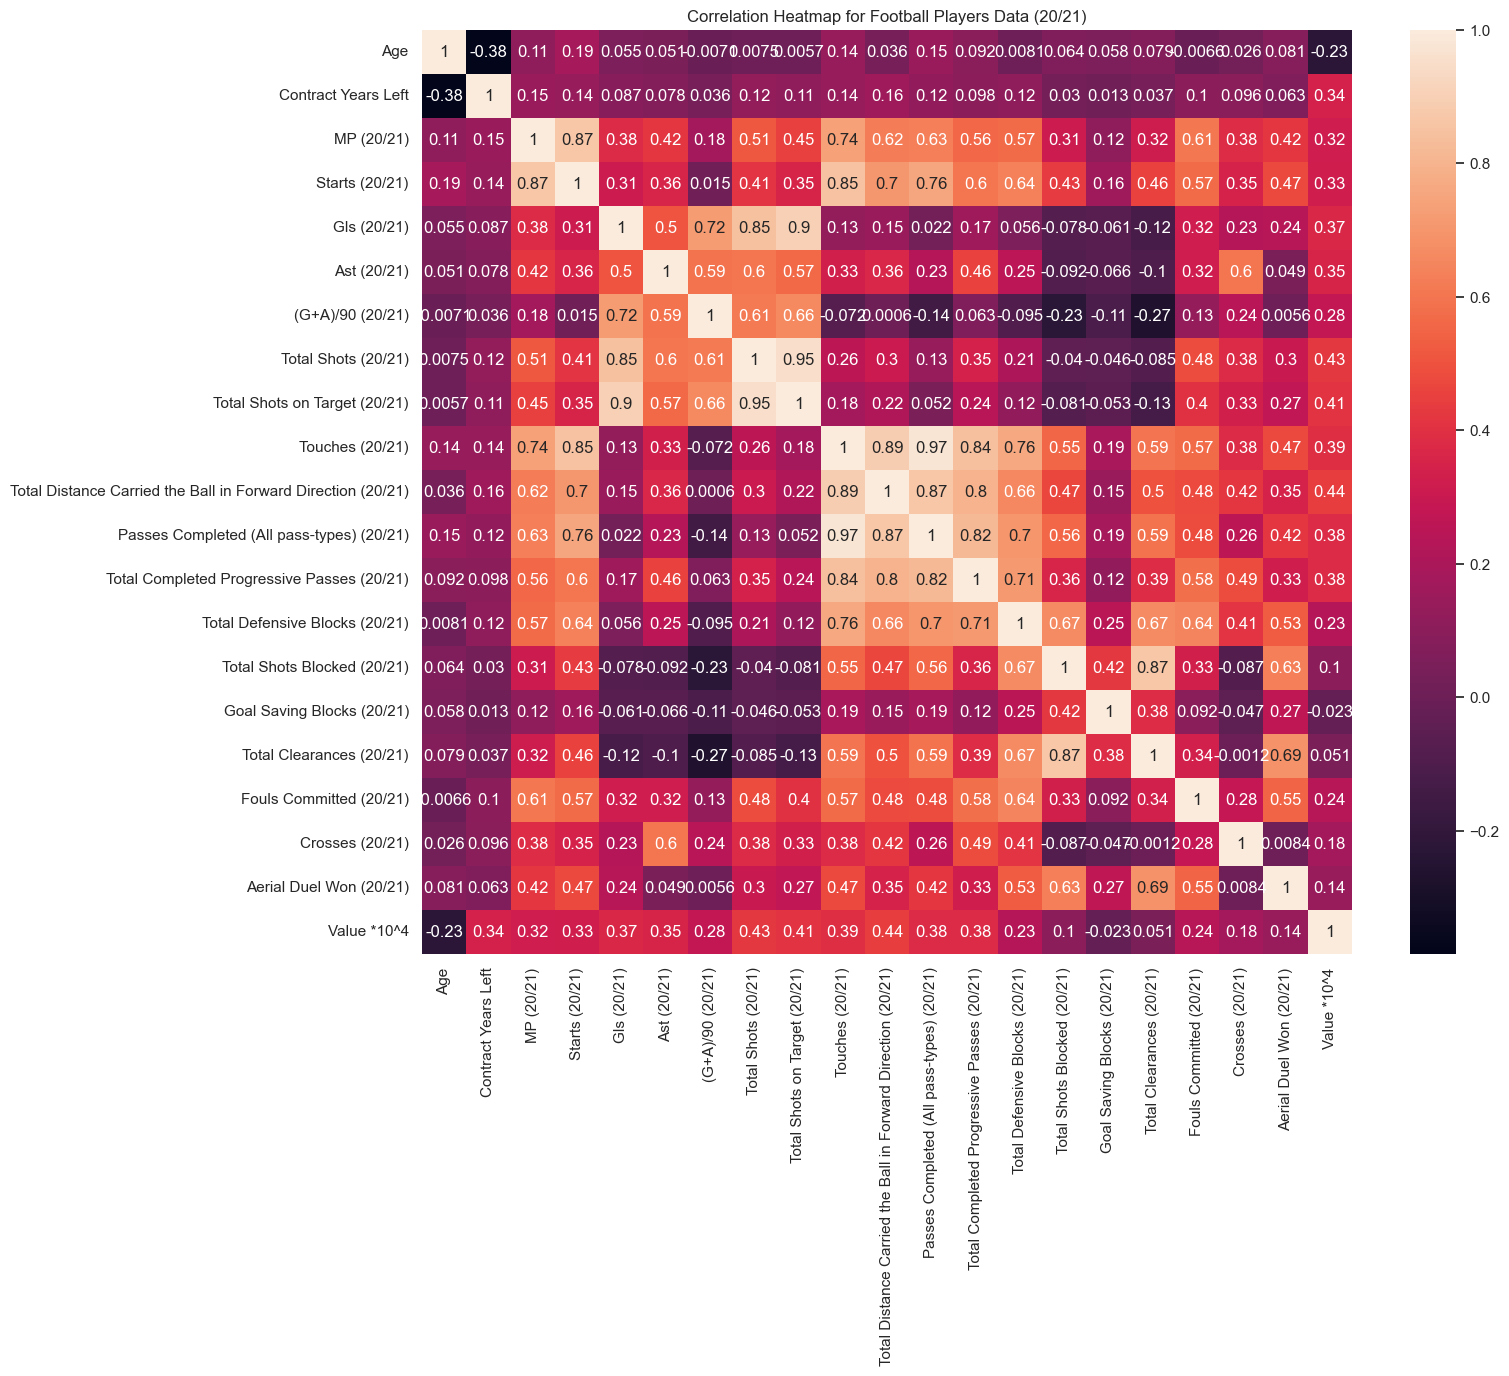

In [38]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap for Football Players Data (20/21)')

In [39]:
# A strong correlation is observed between the following variables:

# MP (20/21) - Starts (20/21): 0.870824
# MP (20/21) - Touches (20/21): 0.731857
# Starts (20/21) - Touches (20/21): 0.844377
# Starts (20/21) - Passes Completed (All pass-types) (20/21): 0.751050
# Gls (20/21) - (G+A)/90 (20/21): 0.746058
# Gls (20/21) - Total Shots (20/21): 0.857514
# Gls (20/21) - Total Shots on Target (20/21): 0.905592
# Total Shots (20/21) - Total Shots on Target (20/21): 0.956054
# Touches (20/21) - Total Distance Carried the Ball in Forward Direction (20/21): 0.888109
# Touches (20/21) - Passes Completed (All pass-types) (20/21): 0.974856
# Touches (20/21) - Total Completed Progressive Passes (20/21): 0.842989
# Touches (20/21) - Total Defensive Blocks (20/21): 0.753387
# Total Distance Carried the Ball in Forward Direction (20/21) - Passes Completed (All pass-types) (20/21): 0.870168
# Total Distance Carried the Ball in Forward Direction (20/21) - Total Completed Progressive Passes (20/21): 0.799640
# Passes Completed (All pass-types) (20/21) - Total Completed Progressive Passes (20/21): 0.815025
# Total Shots Blocked (20/21) - Total Clearances (20/21): 0.866892

We have several variables that are highly correlated when considering a 0.7 threshold. For this reason, we will have to drop several variables. Besides this, we can create three different sets of data with varying levels of astringency, for a 0.7, 0.8 and 0.9 threshold to see how it affects the model.

In [40]:
corr_matrix_thresholded = corr_matrix[(corr_matrix>=0.9) & (corr_matrix<1)]

###### df_num with 0.9 threshold

In [41]:
# df_num with 0.9 threshold

# Based on this data, it is necessary to remove the following variables:

# Total Shots on Target (20/21)
# (G+A)/90 (20/21)
# Total Shots (20/21)
# Starts (20/21)
# Touches (20/21)
# Total Distance Carried the Ball in Forward Direction (20/21)
# Total Completed Progressive Passes (20/21)
# Total Clearances (20/21)

cols_to_drop = ['Total Shots on Target (20/21)', 'Touches (20/21)']

df_num = df_num.drop(cols_to_drop, axis=1)

<Axes: >

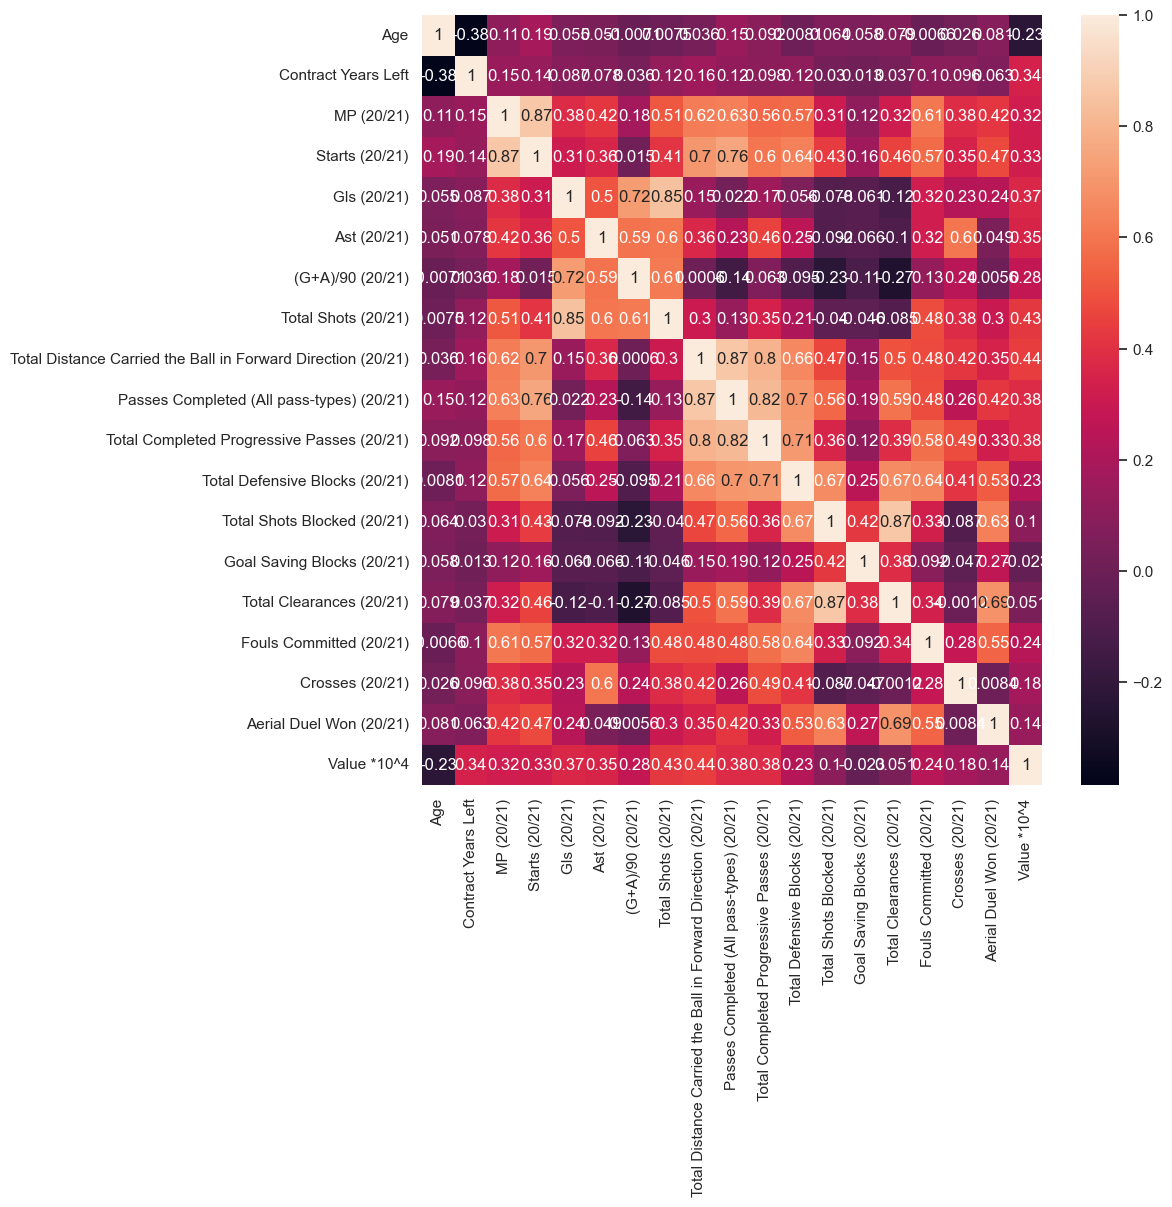

In [42]:
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)

### Splitting

In [43]:
from sklearn.model_selection import train_test_split

##### 0.9 threshold factor dataframe

In [44]:
# Create the dataframe to be used for model training and testing

df_thr = df_clean.drop(cols_to_drop, axis=1)

df_thr = df_thr.drop('Player', axis=1)

In [45]:
# We first drop the target variable 'Value *10^4'x

independent_vars = df_thr.drop('Value *10^4', axis=1)

independent_vars.head(3)

,Club,League,Age,Position,Nation,Contract Years Left,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),...,Total Distance Carried the Ball in Forward Direction (20/21),Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21)
65,Real Madrid,La Liga,18,midfield,France,6.0,35.0,28.0,1.0,2.0,...,4569.0,1447.0,99.0,38.0,3.0,0.0,20.0,56.0,4.0,28.0
66,Manchester City,Premier League,27,Defender,Portugal,4.0,28.0,27.0,2.0,3.0,...,4240.0,1795.0,166.0,38.0,3.0,0.0,36.0,36.0,69.0,35.0
67,AC Milan,Serie A,24,midfield,Cote d'Ivoire,1.0,37.0,36.0,13.0,4.0,...,4343.0,1816.0,123.0,75.0,18.0,0.0,59.0,65.0,16.0,52.0


In [46]:
independent_vars

,Club,League,Age,Position,Nation,Contract Years Left,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),...,Total Distance Carried the Ball in Forward Direction (20/21),Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21)
65,Real Madrid,La Liga,18,midfield,France,6.0,35.0,28.0,1.0,2.0,...,4569.0,1447.0,99.0,38.0,3.0,0.0,20.0,56.0,4.0,28.0
66,Manchester City,Premier League,27,Defender,Portugal,4.0,28.0,27.0,2.0,3.0,...,4240.0,1795.0,166.0,38.0,3.0,0.0,36.0,36.0,69.0,35.0
67,AC Milan,Serie A,24,midfield,Cote d'Ivoire,1.0,37.0,36.0,13.0,4.0,...,4343.0,1816.0,123.0,75.0,18.0,0.0,59.0,65.0,16.0,52.0
68,Borussia Dortmund,Bundesliga,18,midfield,England,4.0,29.0,19.0,1.0,3.0,...,1978.0,889.0,76.0,40.0,6.0,0.0,20.0,40.0,21.0,28.0
69,Everton FC,Premier League,24,attack,Brazil,3.0,34.0,33.0,7.0,3.0,...,3563.0,534.0,42.0,33.0,3.0,0.0,38.0,34.0,23.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,Bayer 04 Leverkusen,Bundesliga,28,Goalkeeper,Germany,1.0,2.0,1.0,0.0,0.0,...,64.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2062,Fulham FC,Premier League,19,midfield,England,1.0,4.0,3.0,1.0,0.0,...,216.0,67.0,5.0,6.0,0.0,0.0,0.0,4.0,2.0,1.0
2066,Dijon FCO,Ligue 1,20,Defender,Cameroon,1.0,3.0,2.0,0.0,0.0,...,109.0,66.0,1.0,8.0,1.0,0.0,7.0,4.0,3.0,2.0
2069,Genoa CFC,Serie A,38,Goalkeeper,Italy,1.0,4.0,4.0,0.0,0.0,...,74.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Definition of X and y

X = independent_vars

y = df_thr[['Value *10^4']]

In [48]:
# Split of the dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [49]:
# remove categoricals, except for position

X_train = X_train.drop(['Club', 'League', 'Nation'], axis=1)
X_test = X_test.drop(['Club', 'League', 'Nation'], axis=1)

### Scaling/Transforming

Data scaling and transforming is performed after the data split and is conducted without the target variable.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

##### 0.7 threshold factor dataframe

In [51]:
X_train.dropna(inplace=True) # We shouldn't have any null values left, but to ensure it we perform a drop

X_train

,Age,Position,Contract Years Left,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),(G+A)/90 (20/21),Total Shots (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21)
168,23,midfield,4.0,25.0,22.0,9.0,4.0,0.600000,55.0,3579.0,468.0,62.0,24.0,4.0,0.0,13.0,16.0,18.0,22.0
1794,24,attack,1.0,9.0,3.0,1.0,0.0,0.230000,10.0,85.0,63.0,6.0,2.0,0.0,0.0,3.0,14.0,0.0,20.0
1216,24,Defender,2.0,24.0,20.0,0.0,3.0,0.033333,7.0,1601.0,813.0,51.0,28.0,4.0,0.0,51.0,28.0,57.0,17.0
174,21,attack,4.0,31.0,30.0,5.0,6.0,0.390000,61.0,5061.0,955.0,53.0,25.0,2.0,0.0,11.0,24.0,127.0,20.0
906,30,attack,1.0,29.0,12.0,5.0,3.0,0.560000,35.0,1662.0,391.0,44.0,21.0,0.0,0.0,3.0,8.0,27.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,30,attack,1.0,22.0,16.0,7.0,1.0,0.610000,29.0,1406.0,261.0,43.0,11.0,1.0,0.0,9.0,25.0,20.0,2.0
1402,34,attack,2.0,27.0,10.0,4.0,1.0,0.420000,15.0,368.0,210.0,9.0,12.0,1.0,0.0,1.0,9.0,2.0,9.0
943,23,Defender,3.0,33.0,33.0,1.0,0.0,0.030000,8.0,3736.0,1418.0,74.0,51.0,31.0,1.0,182.0,23.0,1.0,69.0
1583,27,midfield,3.0,25.0,17.0,0.0,1.0,0.060000,17.0,669.0,529.0,39.0,23.0,8.0,0.0,58.0,27.0,4.0,90.0


#### Numerical Variables - No/Low Skew (Standard Scaling)

In [52]:
scaler = StandardScaler()

In [53]:
# Fit StandardScaler to the column Age, as these values didn't have high skewness
# 'Starts (20/21)' is not fitted here, as the column was drop after the thresholding

scaler.fit(X_train[['Age']])

StandardScaler()

In [54]:
# Apply StandardScaler to the column Age
# Again, here 'Starts (20/21)' is not present as it was dropped after the 0.9 thresholding

X_train[['Age']] = scaler.transform(X_train[['Age']])

In [55]:
X_train.head() # The dataset X_train has been scaled for Starts and Age

,Age,Position,Contract Years Left,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),(G+A)/90 (20/21),Total Shots (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Passes Completed (All pass-types) (20/21),Total Completed Progressive Passes (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21)
168,-0.876199,midfield,4.0,25.0,22.0,9.0,4.0,0.600000,55.0,3579.0,468.0,62.0,24.0,4.0,0.0,13.0,16.0,18.0,22.0
1794,-0.647085,attack,1.0,9.0,3.0,1.0,0.0,0.230000,10.0,85.0,63.0,6.0,2.0,0.0,0.0,3.0,14.0,0.0,20.0
1216,-0.647085,Defender,2.0,24.0,20.0,0.0,3.0,0.033333,7.0,1601.0,813.0,51.0,28.0,4.0,0.0,51.0,28.0,57.0,17.0
174,-1.334426,attack,4.0,31.0,30.0,5.0,6.0,0.390000,61.0,5061.0,955.0,53.0,25.0,2.0,0.0,11.0,24.0,127.0,20.0
906,0.727598,attack,1.0,29.0,12.0,5.0,3.0,0.560000,35.0,1662.0,391.0,44.0,21.0,0.0,0.0,3.0,8.0,27.0,12.0


#### Numerical Variables - High Skew (Power Transforming)

Applying PowerTransformer onto our Value column as plenty of the data is highly skewed to the left.

In [56]:
pt = PowerTransformer()

Based on high skewness, these are the columns where PowerTransformer should be applied for the full clean dataset; but keep in mind that depending on the threshold for the dataframe we are using, we won't have all these columns present. Therefore, it needs to be adjusted for each dataframe.

columns_to_transform = ['Contract Years Left', 'MP (20/21)', 'Gls (20/21)', 'Ast (20/21)', '(G+A)/90 (20/21)', 'Total Shots (20/21)', 'Total Shots on Target (20/21)', 'Touches (20/21)', 'Total Distance Carried the Ball in Forward Direction (20/21)', 'Passes Completed (All pass-types) (20/21)', 'Total Completed Progressive Passes (20/21)', 'Total Defensive Blocks (20/21)', 'Total Shots Blocked (20/21)', 'Goal Saving Blocks (20/21)', 'Total Clearances (20/21)', 'Fouls Committed (20/21)', 'Crosses (20/21)', 'Aerial Duel Won (20/21)']


In [57]:
columns_to_transform = ['Contract Years Left', 'MP (20/21)', 'Gls (20/21)', 'Ast (20/21)', '(G+A)/90 (20/21)', 'Total Shots (20/21)', 'Total Distance Carried the Ball in Forward Direction (20/21)', 'Passes Completed (All pass-types) (20/21)', 'Total Completed Progressive Passes (20/21)', 'Total Defensive Blocks (20/21)', 'Total Shots Blocked (20/21)', 'Goal Saving Blocks (20/21)', 'Total Clearances (20/21)', 'Fouls Committed (20/21)', 'Crosses (20/21)', 'Aerial Duel Won (20/21)']

In [58]:
X_train[columns_to_transform] = pt.fit_transform(X_train[columns_to_transform])

#### Categorical Variables - Nominal - Hot Encoding

In [59]:
# Hot encoding of nominal categorical variables

X_train_dummies = pd.get_dummies(X_train['Position'])

In [60]:
type(X_train_dummies)

pandas.core.frame.DataFrame

In [61]:
# Substitution of columns for nominal categorical variables with the just created dummie columns

X_train = X_train.drop(['Position'], axis=1)

X_train = pd.concat([X_train, X_train_dummies], axis=1)

The training dataframe is ready for feeding the model.

### Model Training

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()

##### 0.9 threshold factor dataframe

In [64]:
# Fitting to the model for the threshold of 0.9 from the correlation matrix

model_ = lm.fit(X_train, y_train)

In [65]:
model_.coef_ # coefficients for the model
model_.intercept_ # intercept for the model

array([816.06125655])

In [66]:
coeffs_ = pd.DataFrame(model_.coef_)

coeffs_.columns = X_train.columns.values

coeffs_

,Age,Contract Years Left,MP (20/21),Starts (20/21),Gls (20/21),Ast (20/21),(G+A)/90 (20/21),Total Shots (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Passes Completed (All pass-types) (20/21),...,Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Total Clearances (20/21),Fouls Committed (20/21),Crosses (20/21),Aerial Duel Won (20/21),Defender,Goalkeeper,attack,midfield
0,-249.042613,177.10144,-349.236994,8.432795,97.56404,76.685844,39.953867,435.563203,63.373636,714.441079,...,43.205275,-19.83934,-436.077659,-135.361275,-183.415344,62.747736,51.430321,-31.405759,47.09057,-67.115132


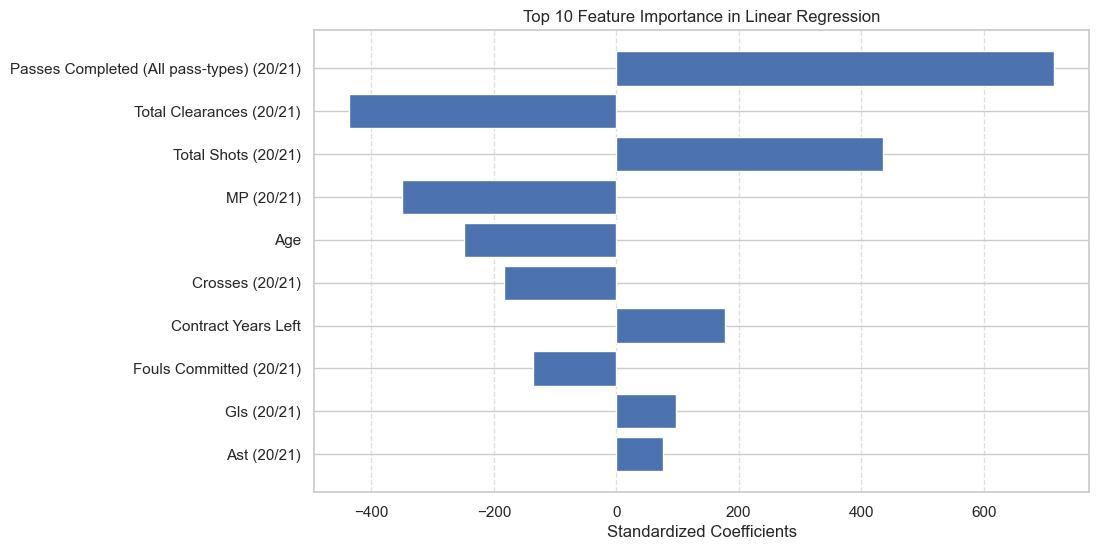

In [67]:
feature_names = X_train.columns # Replace with your actual feature names
coefficients = model_.coef_

# Ensure 1D arrays

feature_names = np.ravel(feature_names)
coefficients = np.ravel(coefficients)

# Get the indices of the top N features based on the absolute coefficients

top_n = 10  # Adjust the number of features you want to display
top_indices = np.abs(coefficients).argsort()[-top_n:]

# Plotting

plt.figure(figsize=(10, 6))
plt.barh(feature_names[top_indices], coefficients[top_indices])
plt.xlabel('Standardized Coefficients')
plt.title(f'Top {top_n} Feature Importance in Linear Regression')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Testing

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict

In [69]:
X_test[['Age']] = scaler.transform(X_test[['Age']])

In [70]:
X_test

X_test[columns_to_transform] = pt.transform(X_test[columns_to_transform])

#columns_to_transform =  ['Contract Years Left', 'MP (20/21)', 'Gls (20/21)', 'Ast (20/21)', 'Passes Completed (All pass-types) (20/21)', 'Total Defensive Blocks (20/21)', 'Total Shots Blocked (20/21)', 'Goal Saving Blocks (20/21)', 'Fouls Committed (20/21)', 'Crosses (20/21)', 'Aerial Duel Won (20/21)']

In [71]:
X_test_dummies = pd.get_dummies(X_test['Position'])

X_test = X_test.drop(['Position'], axis=1)

X_test = pd.concat([X_test, X_test_dummies], axis=1)

In [72]:
# Make predictions on the test set

y_pred = model_.predict(X_test)

In [73]:
real_vs_pred = pd.DataFrame({'y_test': y_test['Value *10^4'], 'y_pred':pd.DataFrame(y_pred)[0]})
real_vs_pred

,y_test,y_pred
0,NaN,-56.018089
1,NaN,-177.405976
2,NaN,598.760701
3,NaN,253.550614
4,NaN,-396.158938
...,...,...
2031,36.0,NaN
2049,27.0,NaN
2051,27.0,NaN
2054,27.0,NaN


In [74]:
# Model Evaluation Metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 545024.1256752016
Root Mean Squared Error (RMSE): 738.2574927999049
Mean Absolute Error (MAE): 560.4595250031912
R-squared (R2): 0.4104004807030115
